In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('household_power_consumption.txt', delimiter = ';')
df.head()

C:\Users\U\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,2021-11-02 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,2021-11-02 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,2021-11-02 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,2021-11-02 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,2021-11-02 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df.set_index('Time', inplace = True)

In [7]:
df_gap_time_daily = df.resample('D').mean()

TypeError: 'value' must be an instance of str or bytes, not a float

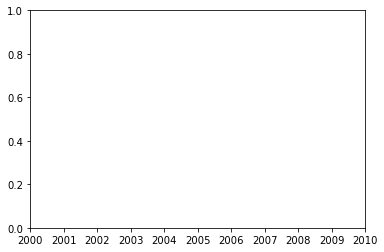

In [50]:
plt.plot(df.index, df['Global_active_power'], '--', marker = '*')

In [20]:
from scipy.stats import pearsonr

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])

pearsonr(df['Global_active_power'], df['Global_reactive_power'])

ValueError: Unable to parse string "?" at position 6839

In [18]:
pearsonr(df['Voltage'], df['Global_intensity'])

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [22]:
threshold = len(df)

In [23]:
train_df = df[: threshold - 365] 
test_df = df[threshold - 365:]

In [ ]:
from fbprophet import Prophet

In [ ]:
df = df.rename(columns = {'Time': 'ds', 'Global_active_power': 'y'})

In [ ]:
model = Prophet()
model.fit(df)

In [24]:
future = model.make_future_dataframe(periods = 10, frequency = 'D')
forecast = model.predict(future)
forecast.head()

NameError: name 'model' is not defined